Code written by Michaela Mohl michaela.mohl@t-online.de

The first goal was to count the word occurrences of my Master Thesis. The goal was to create intermediate files that have for each word a line like ("Thesis":2) meaning that the word "Thesis" occurred twice in the written version of my thesis.This was done with pyspark. 

The final goal was to aggregate these results and to finally show the distribution of word frequencies in my thesis. As how many words were used only once, twice, thrice (...) and to plot these results. This was using the libraries pandas, seaborn, matplotlib and more.  

Ersteller dieses Projektes war Michaela Mohl michaela.mohl@t-online.de

Zuerst wurden die Wort Häufigkeiten meiner Master Arbeit gezählt, dies wurde mit Hilfe von Pyspark umgesetzt. Das erste Stück Code erstellt Hilfsdateien die für jedes Wort eine Zeile die wie folgt aussah (“Thesis”, 2). Dies würde bedeuten, dass das Wort “Thesis” zwei mal in dem ganzen Text meiner Masterarbeit vor kommen würde. 

Im zweiten Teil wurden dann diese Ergebnisse aggregiert. Das Ziel war darzustellen wie viele Wörter nur einmal, zweimal, dreimal (…) vorkommen. Dies wurde dann mit Seaborn in einem Graphen veranschaulicht. 

In [ ]:
import re
import findspark
import pyspark
import random
import csv
import collections
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#This gets the wordcount utilizing pyspark

findspark.init('/home/ela/Downloads/spark-2.4.0-bin-hadoop2.7')

sc = pyspark.SparkContext()

# This file was a TXT file of my master thesis
text_file = sc.textFile("/home/ela/Downloads/MasterThesisMohl.txt")
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
# The final wordcount was saved here
counts.saveAsTextFile("/home/ela/Downloads/MasterThesisMohlWordCount")
sc.stop()

In [1]:
# Reading the final Wordcount files back in 
results = []
parts =['/home/ela/Downloads/MasterThesisMohlWordCount/part-00000','/home/ela/Downloads/MasterThesisMohlWordCount/part-00001']
for part in parts:    
    with open(part) as inputfile:        
        for row in csv.reader(inputfile,delimiter=','):
            results.append(row)

In [5]:
# Seperate the tuples ("Thesis",0) into a list for the words (Thesis, The, Master...) 
# and their respective wordcounts (2,40,6...)
list1 = [i[0] for i in results]
list2 = [i[1] for i in results]

In [6]:
# Had to clean the second list since they sometimes had brackets in them
for i in range(0,len(list2)):
    list2[i] = re.sub("[^0-9]", "", list2[i])


In [7]:
# Stitiching the lists back together to check how that looks
dictionary1 = dict(zip(list1, list2))
dictionary2 = dict(zip(list2, list1))

In [8]:
# Part 2 starts here
# This function aggregates the second list 
# In CounterForOcc will have a line with 1: 2087 
# Which means there are 2087 unique words in my thesis, that were written just once
CounterForOcc = collections.Counter(list2)

In [10]:
# Putting it into a dataframe for the plotting
CounterForOcc = CounterForOcc.most_common()
final_df = pd.DataFrame(CounterForOcc,columns=['Word_Frequency','Amount_of_Occurence'])

In [11]:
final_df = final_df.drop([1])

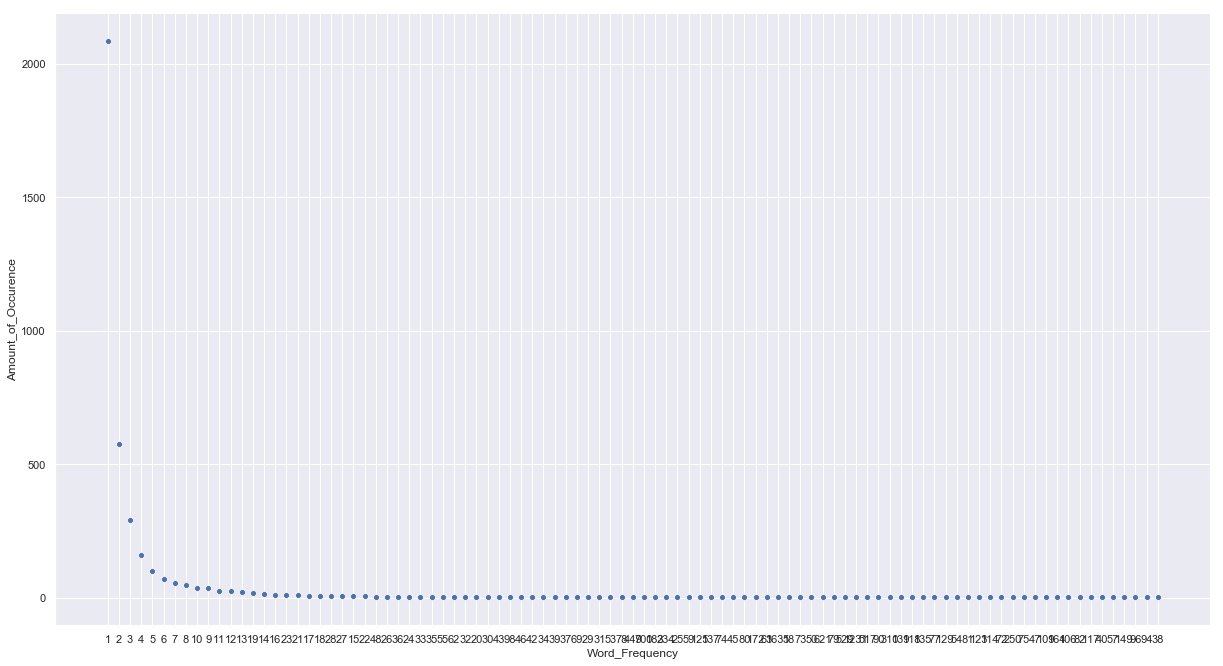

In [12]:
# The complete plot

%matplotlib inline

sns.set(rc={'figure.figsize':(20.7,11.27)})


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Word_Frequency", y="Amount_of_Occurence",
                     palette=cmap,
                     data=final_df)


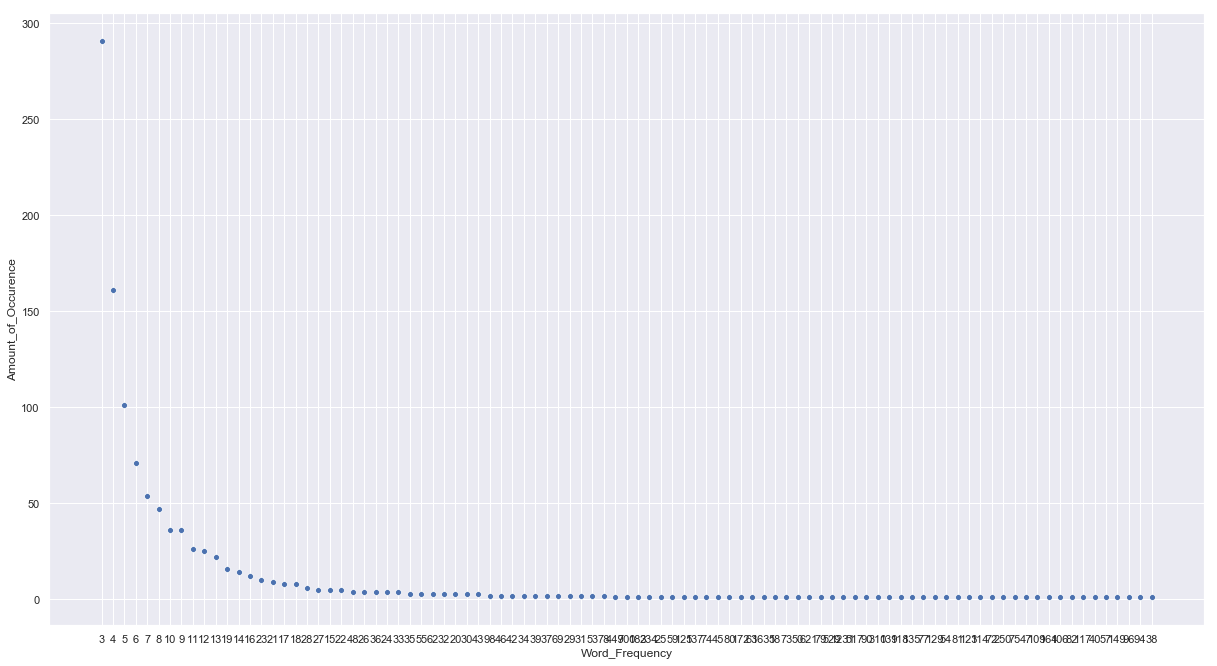

In [15]:
# Deleted the first 2 lines 
# With the goal the weaked the distortion created by the first values
final_df = final_df.drop([0,2])
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,11.27)})


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Word_Frequency", y="Amount_of_Occurence",
                     palette=cmap,
                     data=final_df)
